In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
df=pd.read_csv('corona(mamgithub).csv')

pd.set_option('display.max_columns',None)
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [3]:
df.shape

(23688, 5)

# EDA by sweetviz library

In [4]:
import sweetviz

In [5]:
my_report=sweetviz.analyze([df,'df'],target_feat='Deaths')

:FEATURES DONE:                    |█████████████████████| [100%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [6]:
my_report.show_html('Deaths.html')

Report Deaths.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# Feature Engineering

In [7]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

<AxesSubplot:>

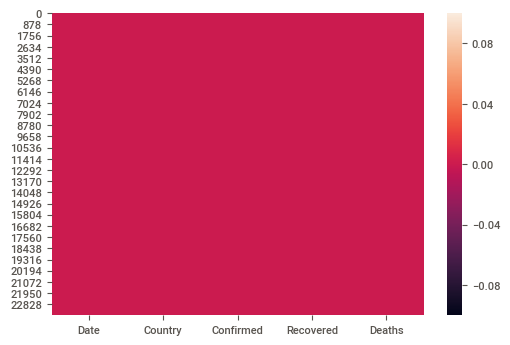

In [8]:
#checking for missing values in the dataset
sns.heatmap(df.isnull())

In [9]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [10]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [11]:
#converting Date column to date time format
df['Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [12]:
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [13]:
#creating new features # instead of adding columns now and later dropping them, you can just exculde them right here
new_df=pd.DataFrame({'year':df['Date'].dt.year,
                     'month':df['Date'].dt.month,
                     'day':df['Date'].dt.day,
                     
#                      'dayofyear':df['Date'].dt.dayofyear,
                     'week':df['Date'].dt.week,           
#                     'dayofweek':df['Date'].dt.dayofweek,
#                     'dayofweekname':df['Date'].dt.weekday_name,
                    'quater':df['Date'].dt.quarter})

In [14]:
df=pd.concat([df,new_df],axis=1)
df.head()

,Date,Country,Confirmed,Recovered,Deaths,year,month,day,week,quater
0,2020-01-22,Afghanistan,0,0,0,2020,1,22,4,1
1,2020-01-22,Albania,0,0,0,2020,1,22,4,1
2,2020-01-22,Algeria,0,0,0,2020,1,22,4,1
3,2020-01-22,Andorra,0,0,0,2020,1,22,4,1
4,2020-01-22,Angola,0,0,0,2020,1,22,4,1


In [15]:
df.sample(n = 10) # sample randomly shows data 

,Date,Country,Confirmed,Recovered,Deaths,year,month,day,week,quater
13147,2020-03-31,Uganda,44,0,0,2020,3,31,14,1
1446,2020-01-29,Pakistan,0,0,0,2020,1,29,5,1
11392,2020-03-22,Mauritius,28,0,2,2020,3,22,12,1
17609,2020-04-24,Niger,681,289,24,2020,4,24,17,2
12835,2020-03-30,Dominican Republic,901,4,42,2020,3,30,14,1
4597,2020-02-15,Italy,3,0,0,2020,2,15,7,1
1399,2020-01-29,Ireland,0,0,0,2020,1,29,5,1
9196,2020-03-10,Tunisia,5,0,0,2020,3,10,11,1
9362,2020-03-11,Seychelles,0,0,0,2020,3,11,11,1
20474,2020-05-09,Togo,153,87,10,2020,5,9,19,2


# Dropping unnecessary columns 

In [16]:
#dropping the columns from which we have already extracted the data by label encoding technique
df=df.drop(['Date'],axis=1) # you dropped the country
df.head()

,Country,Confirmed,Recovered,Deaths,year,month,day,week,quater
0,Afghanistan,0,0,0,2020,1,22,4,1
1,Albania,0,0,0,2020,1,22,4,1
2,Algeria,0,0,0,2020,1,22,4,1
3,Andorra,0,0,0,2020,1,22,4,1
4,Angola,0,0,0,2020,1,22,4,1


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Country"] = le.fit_transform(df["Country"])

In [18]:
df.head()

,Country,Confirmed,Recovered,Deaths,year,month,day,week,quater
0,0,0,0,0,2020,1,22,4,1
1,1,0,0,0,2020,1,22,4,1
2,2,0,0,0,2020,1,22,4,1
3,3,0,0,0,2020,1,22,4,1
4,4,0,0,0,2020,1,22,4,1


In [19]:
#we can see none of the column is highly negatively correlated with the target'Deaths'.no need to drop any columns
#dayofweek is negatively correlated but within range
df.corr()

,Country,Confirmed,Recovered,Deaths,year,month,day,week,quater
Country,1.000000e+00,0.069204,0.019298,0.064954,NaN,-1.068063e-18,-2.078548e-17,1.020574e-17,0.000000
Confirmed,6.920426e-02,1.000000,0.810991,0.929718,NaN,1.408603e-01,5.020675e-03,1.463167e-01,0.137087
Recovered,1.929830e-02,0.810991,1.000000,0.778094,NaN,1.872444e-01,1.122037e-02,1.955464e-01,0.173298
Deaths,6.495418e-02,0.929718,0.778094,1.000000,NaN,1.401759e-01,3.872599e-03,1.453452e-01,0.138090
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,-1.068063e-18,0.140860,0.187244,0.140176,NaN,1.000000e+00,-2.378462e-01,9.706873e-01,0.865909
day,-2.078548e-17,0.005021,0.011220,0.003873,NaN,-2.378462e-01,1.000000e+00,-3.815347e-03,-0.143103
week,1.020574e-17,0.146317,0.195546,0.145345,NaN,9.706873e-01,-3.815347e-03,1.000000e+00,0.858745
quater,0.000000e+00,0.137087,0.173298,0.138090,NaN,8.659087e-01,-1.431031e-01,8.587449e-01,1.000000


In [20]:
# I think I am clear now?yes
# do you want to try it your self or want me to solve it for you?i have done the codes.please check down. okay

In [21]:
df.head()

,Country,Confirmed,Recovered,Deaths,year,month,day,week,quater
0,0,0,0,0,2020,1,22,4,1
1,1,0,0,0,2020,1,22,4,1
2,2,0,0,0,2020,1,22,4,1
3,3,0,0,0,2020,1,22,4,1
4,4,0,0,0,2020,1,22,4,1


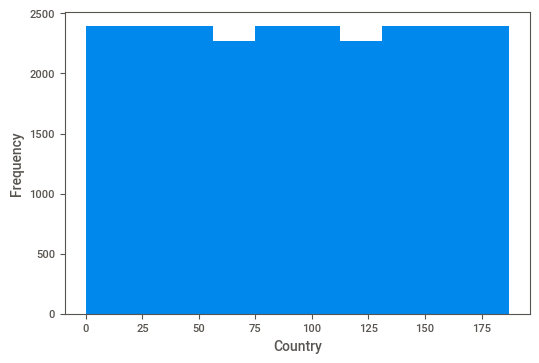

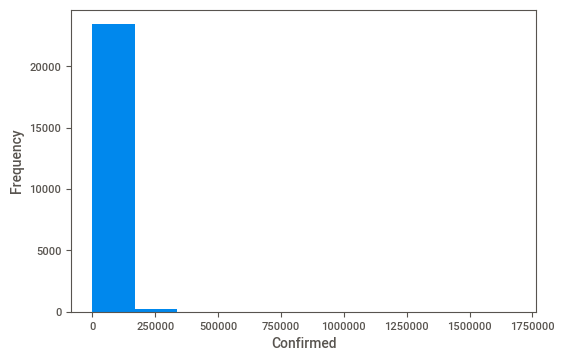

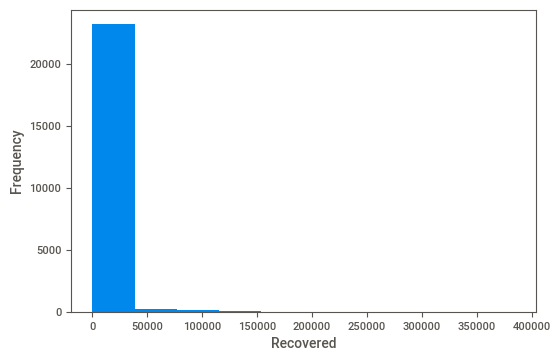

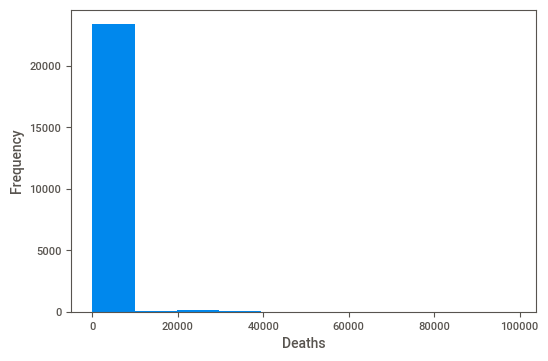

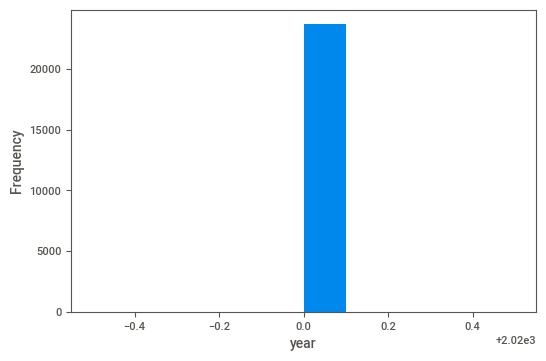

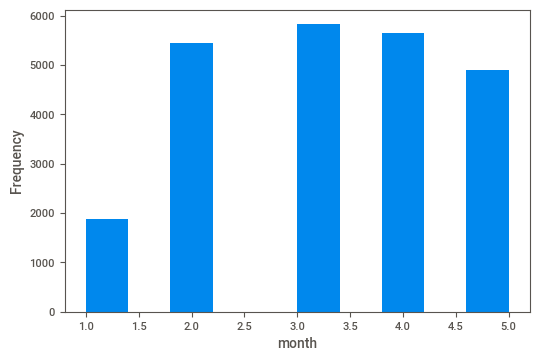

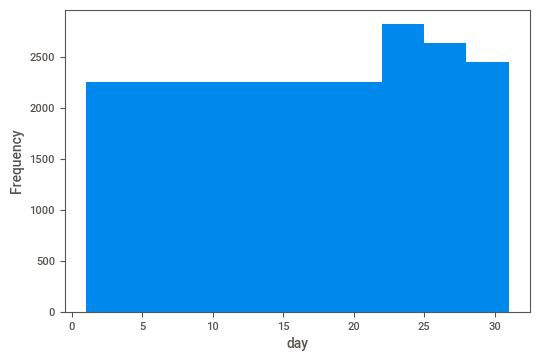

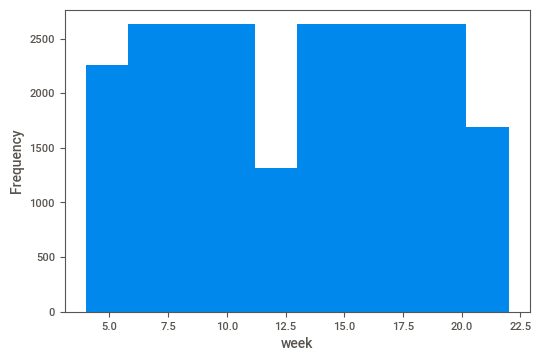

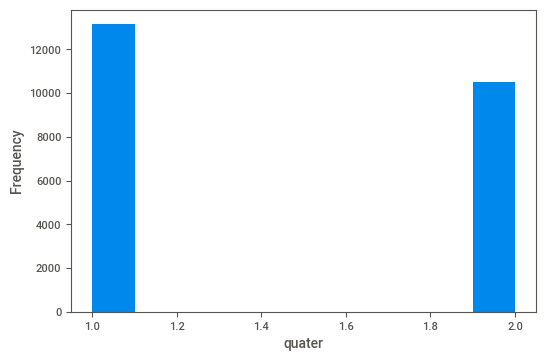

In [22]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.hist()
    plt.xlabel(feature)
    plt.show()

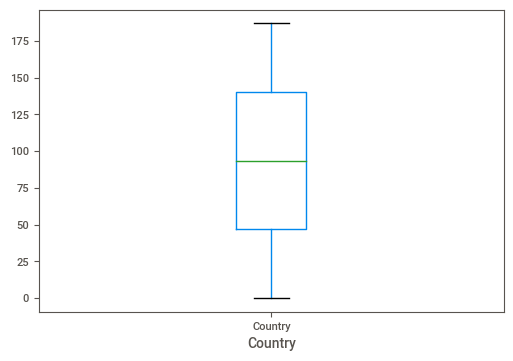

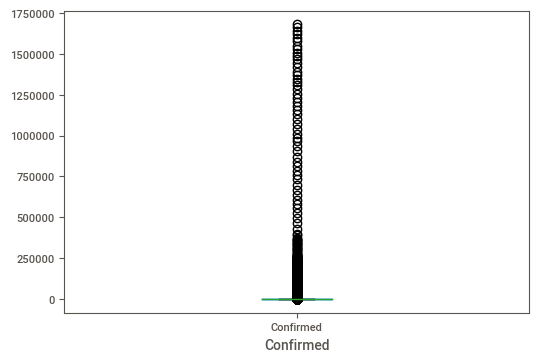

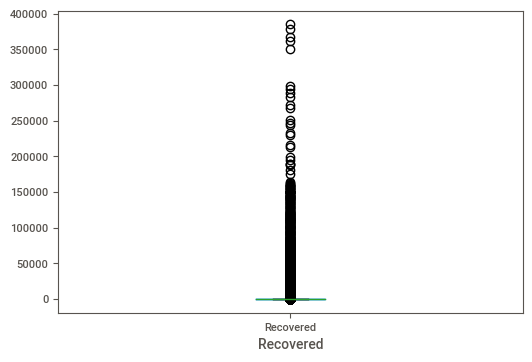

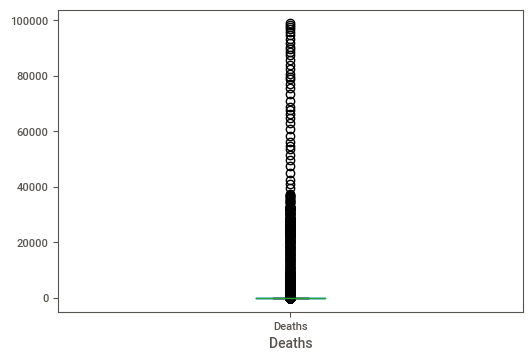

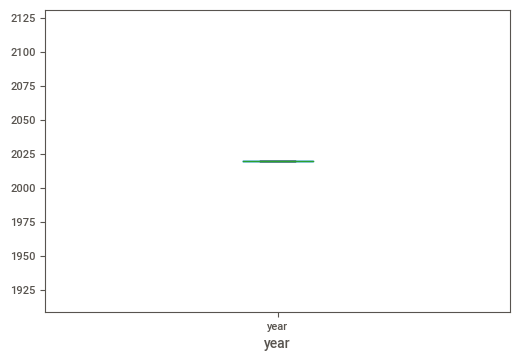

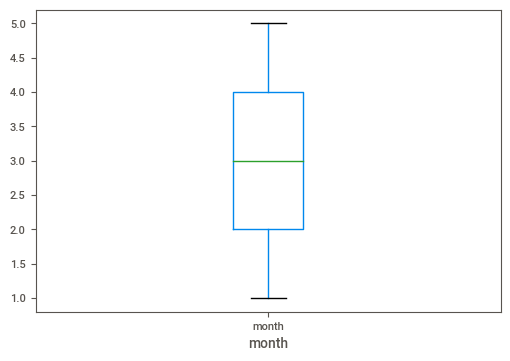

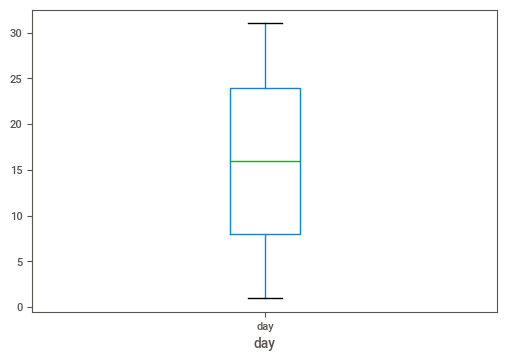

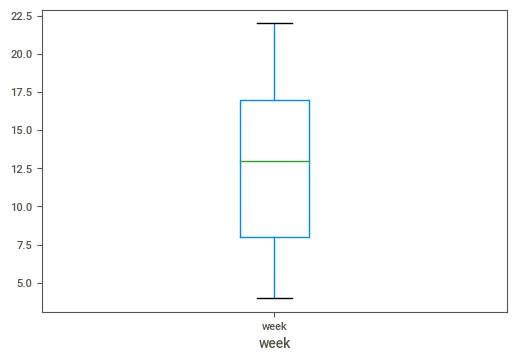

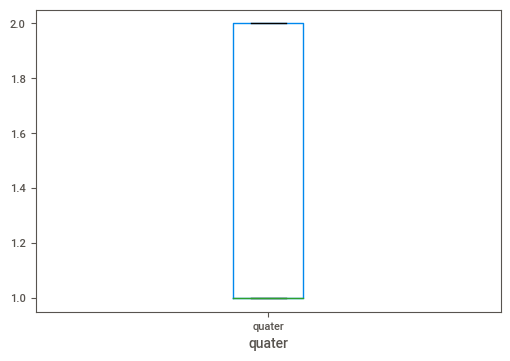

In [23]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

In [24]:
df.head()

,Country,Confirmed,Recovered,Deaths,year,month,day,week,quater
0,0,0,0,0,2020,1,22,4,1
1,1,0,0,0,2020,1,22,4,1
2,2,0,0,0,2020,1,22,4,1
3,3,0,0,0,2020,1,22,4,1
4,4,0,0,0,2020,1,22,4,1


# Segregating target variable and independent variable

In [25]:
y=df[['Deaths']]
x=df.drop(['Deaths','year'],axis=1)

# Removeing skewness by power transformer technique

In [26]:
#checking for skewness
x.skew()

Country       0.000000
Confirmed    18.674502
Recovered    10.662286
month        -0.107605
day          -0.068932
week          0.000619
quater        0.223621
dtype: float64

In [27]:
#when applying power transformer technique check skewness must not be zero in any of the feature,otherwise error.
#'year' skewness was zero,so i removed the feature to carry on with power transformer technique.
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer() 
x_power=pt.fit_transform(x)
x=pd.DataFrame(x_power,columns=x.columns)

In [28]:
x.skew() # can you show me the issue?Deaths.skew > 0.55

Country     -0.278841
Confirmed    0.178414
Recovered    0.412470
month       -0.112722
day         -0.234208
week        -0.126967
quater       0.223621
dtype: float64

In [29]:
x.head()

,Country,Confirmed,Recovered,month,day,week,quater
0,-2.109559,-1.125252,-0.931988,-1.825418,0.708301,-1.800866,-0.894427
1,-2.052431,-1.125252,-0.931988,-1.825418,0.708301,-1.800866,-0.894427
2,-2.003294,-1.125252,-0.931988,-1.825418,0.708301,-1.800866,-0.894427
3,-1.958719,-1.125252,-0.931988,-1.825418,0.708301,-1.800866,-0.894427
4,-1.917256,-1.125252,-0.931988,-1.825418,0.708301,-1.800866,-0.894427


# Scaling the data

In [30]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(x)
x=pd.DataFrame(data=X_scaled,columns=x.columns)


In [31]:
x.head()

,Country,Confirmed,Recovered,month,day,week,quater
0,-2.109559,-1.125252,-0.931988,-1.825418,0.708301,-1.800866,-0.894427
1,-2.052431,-1.125252,-0.931988,-1.825418,0.708301,-1.800866,-0.894427
2,-2.003294,-1.125252,-0.931988,-1.825418,0.708301,-1.800866,-0.894427
3,-1.958719,-1.125252,-0.931988,-1.825418,0.708301,-1.800866,-0.894427
4,-1.917256,-1.125252,-0.931988,-1.825418,0.708301,-1.800866,-0.894427


# Model building

In [32]:
x=x
y=y

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [44]:
knn=KNeighborsRegressor()
svr=SVR()
lr=LinearRegression()
dt=DecisionTreeRegressor()
gbm=GradientBoostingRegressor()
ada=AdaBoostRegressor()
rfr=RandomForestRegressor()
xgb=XGBRegressor()

In [45]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVR',svr))
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dt))
models.append(('GradientBoostingRegressor',gbm))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rfr))
models.append(('XGBRegressor',xgb))

In [46]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [47]:
Model=[]
r2score=[]
rmse=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    score=r2_score(y_test,pre)
    print('R2score  -',score)
    r2score.append(score*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    rmsescore=np.sqrt(mean_squared_error(y_test,pre))
    print('rmse_score  -',rmsescore)
    rmse.append(rmsescore)
    print('\n')
    
    
# if your r2 score is high and cross validation is low, this means you are overfitting the data

***************** KNeighborsClassifier *******************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


R2score  - 0.7773837503248288


cross_val_score  - -0.09866581411110906


rmse_score  - 2030.487446804635


***************** SVR *******************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


R2score  - -0.0070541791650577945


cross_val_score  - 0.016760427479904583


rmse_score  - 4318.652856749551


***************** LinearRegression *******************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2score  - 0.0659883779924616


cross_val_score  - -30.501958683654113


rmse_score  - 4159.087123419836


***************** DecisionTreeRegressor *******************


DecisionTreeRegr

In [48]:
result=pd.DataFrame({'Model':Model,'R2_score':r2score,'RMSEscore':rmse,'Cross_val_score':cv})
result

,Model,R2_score,RMSEscore,Cross_val_score
0,KNeighborsClassifier,77.738375,2030.487447,-9.866581
1,SVR,-0.705418,4318.652857,1.676043
2,LinearRegression,6.598838,4159.087123,-3050.195868
3,DecisionTreeRegressor,98.701118,490.463540,59.501001
4,GradientBoostingRegressor,98.287652,563.141916,16.093296
5,AdaBoostRegressor,95.133234,949.384424,-58.261722
6,RandomForestRegressor,99.506182,302.416469,76.615100
7,XGBRegressor,99.734990,221.540323,69.258882


In [49]:
#hence RandomForestRegressor is the best performing Algorithm for the taken dataset.highest CV score.
#But our target score is 90%
#to achieve 90% score we will apply Gridsearchcv technique to the top3 performing models.

In [50]:
#First lets calculate the random state of the models at which they perform the best.
#Then we will select the top3 models and do gridsearchcv on them to attain our target score of 90%.
#Then Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.

# Finding the best random_state for XGBRegressor

In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>max_r_score:
            max_r_score=score
            final_r_state=r_state
    print('max_r2_score is at random_state  ',final_r_state,'  which is  ',max_r_score)
    return final_r_state
    

In [52]:
print('knn',maxr2_score(knn,x,y))

print('lr',maxr2_score(lr,x,y))
print('dt',maxr2_score(dt,x,y))
print('gbm',maxr2_score(gbm,x,y))
print('rfr',maxr2_score(rfr,x,y))
print('xgb',maxr2_score(xgb,x,y))

print('ada',maxr2_score(ada,x,y))

max_r2_score is at random_state   67   which is   0.814083134968169
knn 67
max_r2_score is at random_state   56   which is   0.08057539152854643
lr 56
max_r2_score is at random_state   51   which is   0.9947853302509418
dt 51
max_r2_score is at random_state   65   which is   0.9879624817321848
gbm 65
max_r2_score is at random_state   95   which is   0.995586317629408
rfr 95
max_r2_score is at random_state   51   which is   0.9976259682624392
xgb 51
max_r2_score is at random_state   51   which is   0.9491924100043132
ada 51


# GridSearchCV

# model1->RandomForestRegressor(random_state=95)=99.55%

In [55]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=95)
rfr=RandomForestRegressor()

In [56]:
parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(rfr,parameters,scoring='r2',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49)
rfr=RandomForestRegressor(max_depth=10,min_samples_leaf=1,n_estimators=100)
rfr.fit(x,y)
pred_rfr=rfr.predict(x_test)
score=r2_score(y_test,pred_rfr)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2_score=   0.9982727835274645
RMSE score=  153.2665980535001


In [58]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
rfr=RandomForestRegressor(max_depth=10,min_samples_leaf=1,n_estimators=100)
rfr.fit(x,y)
cvs=cross_val_score(rfr,x,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())

cross_val_scores=   0.5551036333699126


# model2->XGBoost(random_state=51)99.76=%

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51)
xgb=XGBRegressor()

In [62]:
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],'max_depth':[3,4,5,6,7,8],'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]}]
            
gscv=GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=5)
grid_search=gscv.fit(x,y)
grid_search.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 4}

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51)
xgb=XGBRegressor(colsample_bytree=0.6, learning_rate=0.2, max_depth=4)
xgb.fit(x,y)
pred=xgb.predict(x_test)
print('r2_score=  ',r2_score(y_test,pred))
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score=   0.9985102470323008
RMSE score=  187.30988905225092


In [66]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
xgb=XGBRegressor(colsample_bytree=0.6, learning_rate=0.2, max_depth=4)
xgb.fit(x,y)
cvs=cross_val_score(xgb,x,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())

cross_val_scores=   0.5464309028880872


# Saving the final RandomForestRegressor Model

In [69]:
#From all the model tried above RandomForestRegressor model has highest cross_val_score.
#Hence saving the RandomForestRegressor model as our final model
#corresponding random_state=51
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49)
rfr=RandomForestRegressor(max_depth=10,min_samples_leaf=1,n_estimators=100)
rfr.fit(x,y)
pred_rfr=rfr.predict(x_test)
score=r2_score(y_test,pred_rfr)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2_score=   0.9981517840428943
RMSE score=  158.5442478311854


In [70]:
#Cross validating the model and checking the cross_val_score.

rfr=RandomForestRegressor(max_depth=10,min_samples_leaf=1,n_estimators=100)
rfr.fit(x,y)
cvs=cross_val_score(rfr,x,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())

cross_val_scores=   0.6012537293610085


In [71]:
from sklearn.externals import joblib
joblib.dump(rfr,'practiceproject_19.obj')

['practiceproject_19.obj']

In [72]:
model=joblib.load('practiceproject_19.obj')

In [76]:
test=model.predict(x_test)
test[:10]

array([2.30356216e-02, 2.30356216e-02, 8.16001704e-01, 5.35659410e-01,
       2.42085342e-02, 2.30356216e-02, 3.45591599e+00, 4.24465887e-02,
       9.38307854e+00, 1.30623079e+02])

# Saving final predictions in file.csv

In [77]:
final_predictions=pd.DataFrame(test,columns=['Deaths'])

In [78]:
final_predictions.to_csv('E:\\final_predictionDeaths.csv',index=False)

# Conclusion:-